In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense,Dropout
from sklearn.preprocessing import StandardScaler

In [26]:
import tensorflow

In [27]:
DATA = pd.read_csv('musk_csv.csv')

In [28]:
DATA.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1


In [29]:
DATA.shape

(6598, 170)

In [30]:
0.2*DATA.shape[0]

1319.6000000000001

In [31]:
DATA = DATA.sample(frac=1).reset_index(drop=True)
DATA_TRAIN = DATA.iloc[1320:,:]
DATA_TEST = DATA.iloc[:1320,:]

In [32]:
DATA_TRAIN.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
1320,2175,NON-MUSK-251,251_2+1,43,-147,33,-74,-117,-149,-148,...,-255,-199,-32,147,125,159,-66,-144,-6,0
1321,3054,NON-MUSK-252,252_4+173,38,69,30,-29,-116,-155,-161,...,-243,-204,-23,37,28,256,-70,-245,-21,0
1322,1700,NON-MUSK-210,210_1+8,30,-87,-58,135,-116,93,42,...,-317,-208,-65,103,75,277,-69,-267,-17,0
1323,2626,NON-MUSK-252,252_2+246,35,-81,-132,101,-117,0,165,...,-265,-206,-16,15,108,203,-53,-154,121,0
1324,5655,NON-MUSK-j147,j147_1+174,41,-158,-123,107,-117,26,76,...,-257,-206,-96,139,103,225,-73,-213,-5,0


In [33]:
DATA_TEST.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,2064,NON-MUSK-244,244_2+17,44,-103,-18,-72,-117,37,-165,...,-292,15,-8,149,128,157,-66,-142,-2,0
1,3936,NON-MUSK-326,326_4+18,4,-192,-123,29,-117,-81,51,...,-66,-197,-129,3,8,140,-52,-110,70,0
2,4081,NON-MUSK-f146,f146_1+157,238,-199,-111,-63,-117,53,26,...,-302,57,-134,-17,13,388,-267,-255,119,0
3,683,MUSK-287,287_2+29,37,-133,-127,35,-117,-88,49,...,-63,-195,-5,26,112,193,-55,-149,110,1
4,1118,NON-MUSK-192,192_1+19,112,60,-144,-77,-117,10,56,...,-81,-136,36,255,290,144,-58,-117,60,0


In [34]:
DATA_TRAIN.reset_index(inplace=True,drop=True)

In [35]:
DATA_TEST.reset_index(inplace=True,drop=True)

In [36]:
DATA_TEST.shape

(1320, 170)

In [37]:
DATA_TRAIN.shape

(5278, 170)

In [38]:
to_drop = ['molecule_name','conformation_name','ID']
DATA_TRAIN.drop(columns=to_drop,inplace=True)
DATA_TEST.drop(columns=to_drop,inplace=True)

c:\users\vj\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [39]:
DATA.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,2064,NON-MUSK-244,244_2+17,44,-103,-18,-72,-117,37,-165,...,-292,15,-8,149,128,157,-66,-142,-2,0
1,3936,NON-MUSK-326,326_4+18,4,-192,-123,29,-117,-81,51,...,-66,-197,-129,3,8,140,-52,-110,70,0
2,4081,NON-MUSK-f146,f146_1+157,238,-199,-111,-63,-117,53,26,...,-302,57,-134,-17,13,388,-267,-255,119,0
3,683,MUSK-287,287_2+29,37,-133,-127,35,-117,-88,49,...,-63,-195,-5,26,112,193,-55,-149,110,1
4,1118,NON-MUSK-192,192_1+19,112,60,-144,-77,-117,10,56,...,-81,-136,36,255,290,144,-58,-117,60,0


In [40]:
#DATA_TEST.head()

In [65]:
model = Sequential()

model.add(Dense(units = 166,input_shape = (166,)))
model.add(Dense(units = 512))
model.add(Dropout(0.2))
model.add(Dense(units = 128))
model.add(Dense(units = 64))
model.add(Dropout(0.2))
model.add(Dense(units = 32))
model.add(Dense(units = 1))
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 166)               27722     
_________________________________________________________________
dense_52 (Dense)             (None, 512)               85504     
_________________________________________________________________
dropout_17 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_53 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_54 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_18 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_55 (Dense)             (None, 32)              

In [66]:
model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])

In [67]:
X_TRAIN = DATA_TRAIN.iloc[:,:166]
Y_TRAIN = DATA_TRAIN.iloc[:,166:].values

In [68]:
scaler = StandardScaler()

X_TRAIN = scaler.fit_transform(X_TRAIN)

In [69]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("BEST_MODEL.h5", monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

hist = model.fit(X_TRAIN, Y_TRAIN, validation_split=0.2, epochs =30, batch_size=128, callbacks=[checkpoint])

Train on 4222 samples, validate on 1056 samples
Epoch 1/30
4222/4222 [==============================] - 1s 140us/step - loss: 1.1109 - acc: 0.4730 - val_loss: 0.0970 - val_acc: 0.8968

Epoch 00001: val_loss improved from inf to 0.09702, saving model to BEST_MODEL.h5
Epoch 2/30
4222/4222 [==============================] - 0s 46us/step - loss: 0.1848 - acc: 0.7620 - val_loss: 0.0800 - val_acc: 0.9119

Epoch 00002: val_loss improved from 0.09702 to 0.08001, saving model to BEST_MODEL.h5
Epoch 3/30
4222/4222 [==============================] - 0s 40us/step - loss: 0.1312 - acc: 0.8373 - val_loss: 0.0717 - val_acc: 0.9062

Epoch 00003: val_loss improved from 0.08001 to 0.07171, saving model to BEST_MODEL.h5
Epoch 4/30
4222/4222 [==============================] - 0s 39us/step - loss: 0.1112 - acc: 0.8664 - val_loss: 0.0717 - val_acc: 0.9100

Epoch 00004: val_loss improved from 0.07171 to 0.07167, saving model to BEST_MODEL.h5
Epoch 5/30
4222/4222 [==============================] - 0s 38us/ste

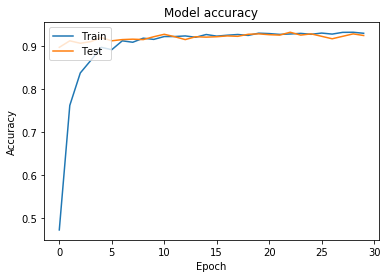

In [80]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('acc.png')
plt.show()


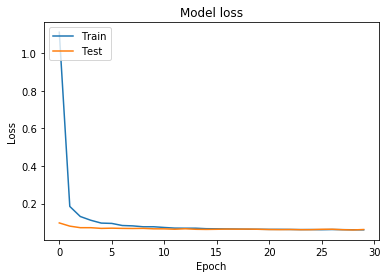

In [81]:
# Plot training & validation loss values
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('loss.png')
plt.show()

In [72]:

DATA_TEST_X = DATA_TEST.iloc[:,:166]
DATA_TEST_Y = DATA_TEST.iloc[:,166:]

In [73]:
PRED_Y = model.predict(DATA_TEST_X)

In [74]:
for i in range(len(PRED_Y)):
    
    if PRED_Y[i] < 0:
        PRED_Y[i] = 0
    elif PRED_Y[i] > 0:
        PRED_Y[i] = 1

In [75]:
acc = 0
for i in range(len(PRED_Y)):
    if PRED_Y[i]==DATA_TEST_Y.values[i]:
        acc+=1
        
ACCURACY = (acc/len(PRED_Y))*100
print(ACCURACY)

92.12121212121212


In [78]:
plt.savefig?